In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import  wavfile
from IPython.display import Audio, display
import scipy.signal as ss

In [2]:
file = "practice.wav"
fs, data = wavfile.read(file)

In [3]:
d = 8 #m
c = 244 #m/s
delta = d/c
print(delta)
#para encontrar o número de amostras correspondente
n_delta = delta*fs
print(int(n_delta))
bk = np.zeros(int(n_delta) + 1)
bk[int(n_delta)] = 1
somDireto = ss.lfilter(bk,1,data)

0.03278688524590164
1573


In [4]:
display(Audio(somDireto, rate = fs))

In [5]:
l = 4
delta1 = 2 * np.sqrt(l**2 + (d/2)**2)/c
delta2 = (10)/c
print(delta1)
n_delta1 = delta1*fs
n_delta2 = delta2*fs
print(int(n_delta2))
bk = np.zeros(int(n_delta1) + 1)
bk[int(n_delta)] = 1
bk[int(n_delta1)] = 2
bk[int(n_delta2)] = 1
somReflexos = ss.lfilter(bk, 1, data)

0.046367657782724434
1967


# REVERB (with comb filter)

<StemContainer object of 3 artists>

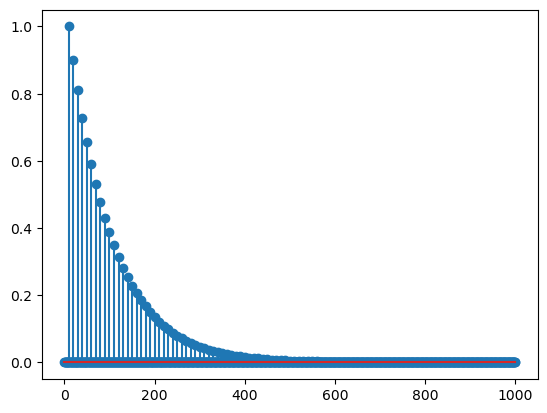

In [16]:
m = 10
g = 0.9 #Valor de g pode ser entre 0 e 1
bk_comb = np.zeros(m + 1) 
ak_comb = np.zeros(m + 1)
bk_comb[m] = 1
ak_comb[0] = 1
ak_comb[m] = -g
impulso = np.hstack([1, np.zeros(1000)])
y = ss.lfilter(bk_comb,ak_comb,impulso)
plt.stem(y)